In [ ]:
pip install pm4py

In [ ]:
import pandas as pd
import json
import math
import numpy as np
import pm4py

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = np.load('/content/gdrive/My Drive/mid/mid_tier_0.npy', allow_pickle=True)
data = np.append(data, np.load('/content/gdrive/My Drive/mid/mid_tier_1.npy', allow_pickle=True), axis=0)
data = np.append(data, np.load('/content/gdrive/My Drive/mid/mid_tier_2.npy', allow_pickle=True), axis=0)

In [ ]:
data = np.append(data, np.load('/content/gdrive/My Drive/mid/mid_tier_3.npy', allow_pickle=True), axis=0)
data = np.append(data, np.load('/content/gdrive/My Drive/mid/mid_tier_4.npy', allow_pickle=True), axis=0)
data = np.append(data, np.load('/content/gdrive/My Drive/mid/mid_tier_5.npy', allow_pickle=True), axis=0)
data = np.append(data, np.load('/content/gdrive/My Drive/mid/mid_tier_6.npy', allow_pickle=True), axis=0)

In [ ]:
data = np.append(data, np.load('/content/gdrive/My Drive/mid/mid_tier_7.npy', allow_pickle=True), axis=0)
data = np.append(data, np.load('/content/gdrive/My Drive/mid/mid_tier_8.npy', allow_pickle=True), axis=0)
data = np.append(data, np.load('/content/gdrive/My Drive/mid/mid_tier_9.npy', allow_pickle=True), axis=0)
data = np.append(data, np.load('/content/gdrive/My Drive/mid/mid_tier_10.npy', allow_pickle=True), axis=0)

In [ ]:
data = np.append(data, np.load('/content/gdrive/My Drive/mid/mid_tier_11.npy', allow_pickle=True), axis=0)
data = np.append(data, np.load('/content/gdrive/My Drive/mid/mid_tier_12.npy', allow_pickle=True), axis=0)
data = np.append(data, np.load('/content/gdrive/My Drive/mid/mid_tier_13.npy', allow_pickle=True), axis=0)
data = np.append(data, np.load('/content/gdrive/My Drive/mid/mid_tier_14.npy', allow_pickle=True), axis=0)

In [ ]:
data = np.append(data, np.load('/content/gdrive/My Drive/mid/mid_tier_15.npy', allow_pickle=True), axis=0)
data = np.append(data, np.load('/content/gdrive/My Drive/mid/mid_tier_16.npy', allow_pickle=True), axis=0)
data = np.append(data, np.load('/content/gdrive/My Drive/mid/mid_tier_17.npy', allow_pickle=True), axis=0)
data = np.append(data, np.load('/content/gdrive/My Drive/mid/mid_tier_18.npy', allow_pickle=True), axis=0)

In [ ]:
len(data)

2000

In [ ]:
game = []

for i in range(len(data)):
  gg = []
  for j in range(len(data[i]['info']['frames'])):
      for k in range(len(data[i]['info']['frames'][j]['events'])):
        if(data[i]['info']['frames'][j]['events'][k]['type'] == 'ELITE_MONSTER_KILL'):
          gg.append(data[i]['info']['frames'][j]['events'][k])
        if(data[i]['info']['frames'][j]['events'][k]['type'] == 'GAME_END'):
          gg.append(data[i]['info']['frames'][j]['events'][k])

  game.append(gg)

len(game)

1000

In [ ]:
WT = []

for i in range(len(game)):
  for j in range(len(game[i])):
    if(game[i][j]['type'] == 'GAME_END'):
      WT.append(game[i][j]['winningTeam'])

In [ ]:
data = []

for i in range(len(game)):
  for j in range(len(game[i])):
    if(WT[i] == 100):
      if(game[i][j]['type'] == 'ELITE_MONSTER_KILL'):
        if(game[i][j]['monsterType'] == 'DRAGON'):
          if(game[i][j]['killerTeamId'] == 100):
            data.append([i, game[i][j]['monsterType'] + ' KILL', game[i][j]['monsterSubType'], game[i][j]['timestamp']])
          elif(game[i][j]['killerTeamId'] == 200):
            data.append([i, game[i][j]['monsterType'] + ' LOSE', game[i][j]['monsterSubType'], game[i][j]['timestamp']])
        else:
          if(game[i][j]['killerTeamId'] == 100):
            data.append([i, game[i][j]['monsterType'] + ' KILL', 0, game[i][j]['timestamp']])
          elif(game[i][j]['killerTeamId'] == 200):
            data.append([i, game[i][j]['monsterType'] + ' LOSE', 0, game[i][j]['timestamp']])
          else:
            data.append([i, game[i][j]['monsterType'] + ' MISS', 0, game[i][j]['timestamp']])

      if(game[i][j]['type'] == 'GAME_END'):
        data.append([i, 'WIN', 0, game[i][j]['timestamp']])

    else:
      if(game[i][j]['type'] == 'ELITE_MONSTER_KILL'):
        if(game[i][j]['monsterType'] == 'DRAGON'):
          if(game[i][j]['killerTeamId'] == 200):
            data.append([i, game[i][j]['monsterType'] + ' KILL', game[i][j]['monsterSubType'], game[i][j]['timestamp']])
          elif(game[i][j]['killerTeamId'] == 100):
            data.append([i, game[i][j]['monsterType'] + ' LOSE', game[i][j]['monsterSubType'], game[i][j]['timestamp']])
        else:
          if(game[i][j]['killerTeamId'] == 200):
            data.append([i, game[i][j]['monsterType'] + ' KILL', 0, game[i][j]['timestamp']])
          elif(game[i][j]['killerTeamId'] == 100):
            data.append([i, game[i][j]['monsterType'] + ' LOSE', 0, game[i][j]['timestamp']])
          else:
            data.append([i, game[i][j]['monsterType'] + ' MISS', 0, game[i][j]['timestamp']])

      if(game[i][j]['type'] == 'GAME_END'):
        data.append([i, 'WIN', 0, game[i][j]['timestamp']])






data

[[0, 'DRAGON KILL', 'AIR_DRAGON', 561526],
 [0, 'RIFTHERALD LOSE', 0, 594597],
 [0, 'DRAGON KILL', 'EARTH_DRAGON', 905522],
 [0, 'RIFTHERALD KILL', 0, 1070776],
 [0, 'DRAGON KILL', 'WATER_DRAGON', 1216542],
 [0, 'BARON_NASHOR LOSE', 0, 1305643],
 [0, 'DRAGON LOSE', 'WATER_DRAGON', 1525687],
 [0, 'BARON_NASHOR KILL', 0, 1797561],
 [0, 'DRAGON KILL', 'WATER_DRAGON', 1840239],
 [0, 'WIN', 0, 1969460],
 [1, 'RIFTHERALD KILL', 0, 652701],
 [1, 'DRAGON KILL', 'FIRE_DRAGON', 759373],
 [1, 'RIFTHERALD LOSE', 0, 1061818],
 [1, 'DRAGON KILL', 'WATER_DRAGON', 1086365],
 [1, 'DRAGON KILL', 'AIR_DRAGON', 1401105],
 [1, 'WIN', 0, 1700638],
 [2, 'RIFTHERALD KILL', 0, 623366],
 [2, 'DRAGON LOSE', 'EARTH_DRAGON', 809888],
 [2, 'WIN', 0, 1147188],
 [3, 'RIFTHERALD LOSE', 0, 521108],
 [3, 'DRAGON KILL', 'WATER_DRAGON', 549721],
 [3, 'RIFTHERALD LOSE', 0, 923857],
 [3, 'DRAGON LOSE', 'AIR_DRAGON', 1015186],
 [3, 'BARON_NASHOR LOSE', 0, 1321019],
 [3, 'DRAGON KILL', 'FIRE_DRAGON', 1392117],
 [3, 'DRAGON LO

In [ ]:
df_example_log = pd.DataFrame(data)
df_example_log.columns = ['case_id', 'activity', 'type', 'timestamp']
df_example_log

,case_id,activity,type,timestamp
0,0,DRAGON KILL,AIR_DRAGON,561526
1,0,RIFTHERALD LOSE,0,594597
2,0,DRAGON KILL,EARTH_DRAGON,905522
3,0,RIFTHERALD KILL,0,1070776
4,0,DRAGON KILL,WATER_DRAGON,1216542
...,...,...,...,...
6196,999,RIFTHERALD KILL,0,1098585
6197,999,DRAGON LOSE,WATER_DRAGON,1154282
6198,999,DRAGON LOSE,EARTH_DRAGON,1466700
6199,999,BARON_NASHOR KILL,0,1518696


In [ ]:
event_log_pm4py = pm4py.format_dataframe(df_example_log, case_id = 'case_id', activity_key="activity",
                                         timestamp_key='timestamp', timest_format='%S') 

In [ ]:
def basic_data_analysis(event_log):
  num_events = len(event_log)
  num_cases = len(event_log['case:concept:name'].unique())
  start_activities = pm4py.get_start_activities(event_log)
  end_activities = pm4py.get_end_activities(event_log)
  #mean_case_durations = np.round(np.mean(pm4py.stats.get_all_case_durations(event_log)/1000/60), 2) #분단위
  print("Number of events: {}\nNumber of cases: {}\nStart activites: {}\nEnd activites: {}\n".format(num_events, num_cases, start_activities, end_activities))

In [ ]:
basic_data_analysis(event_log_pm4py) 

Number of events: 6201
Number of cases: 1000
Start activites: {'DRAGON KILL': 405, 'DRAGON LOSE': 222, 'RIFTHERALD KILL': 188, 'RIFTHERALD LOSE': 117, 'WIN': 68}
End activites: {'WIN': 1000}



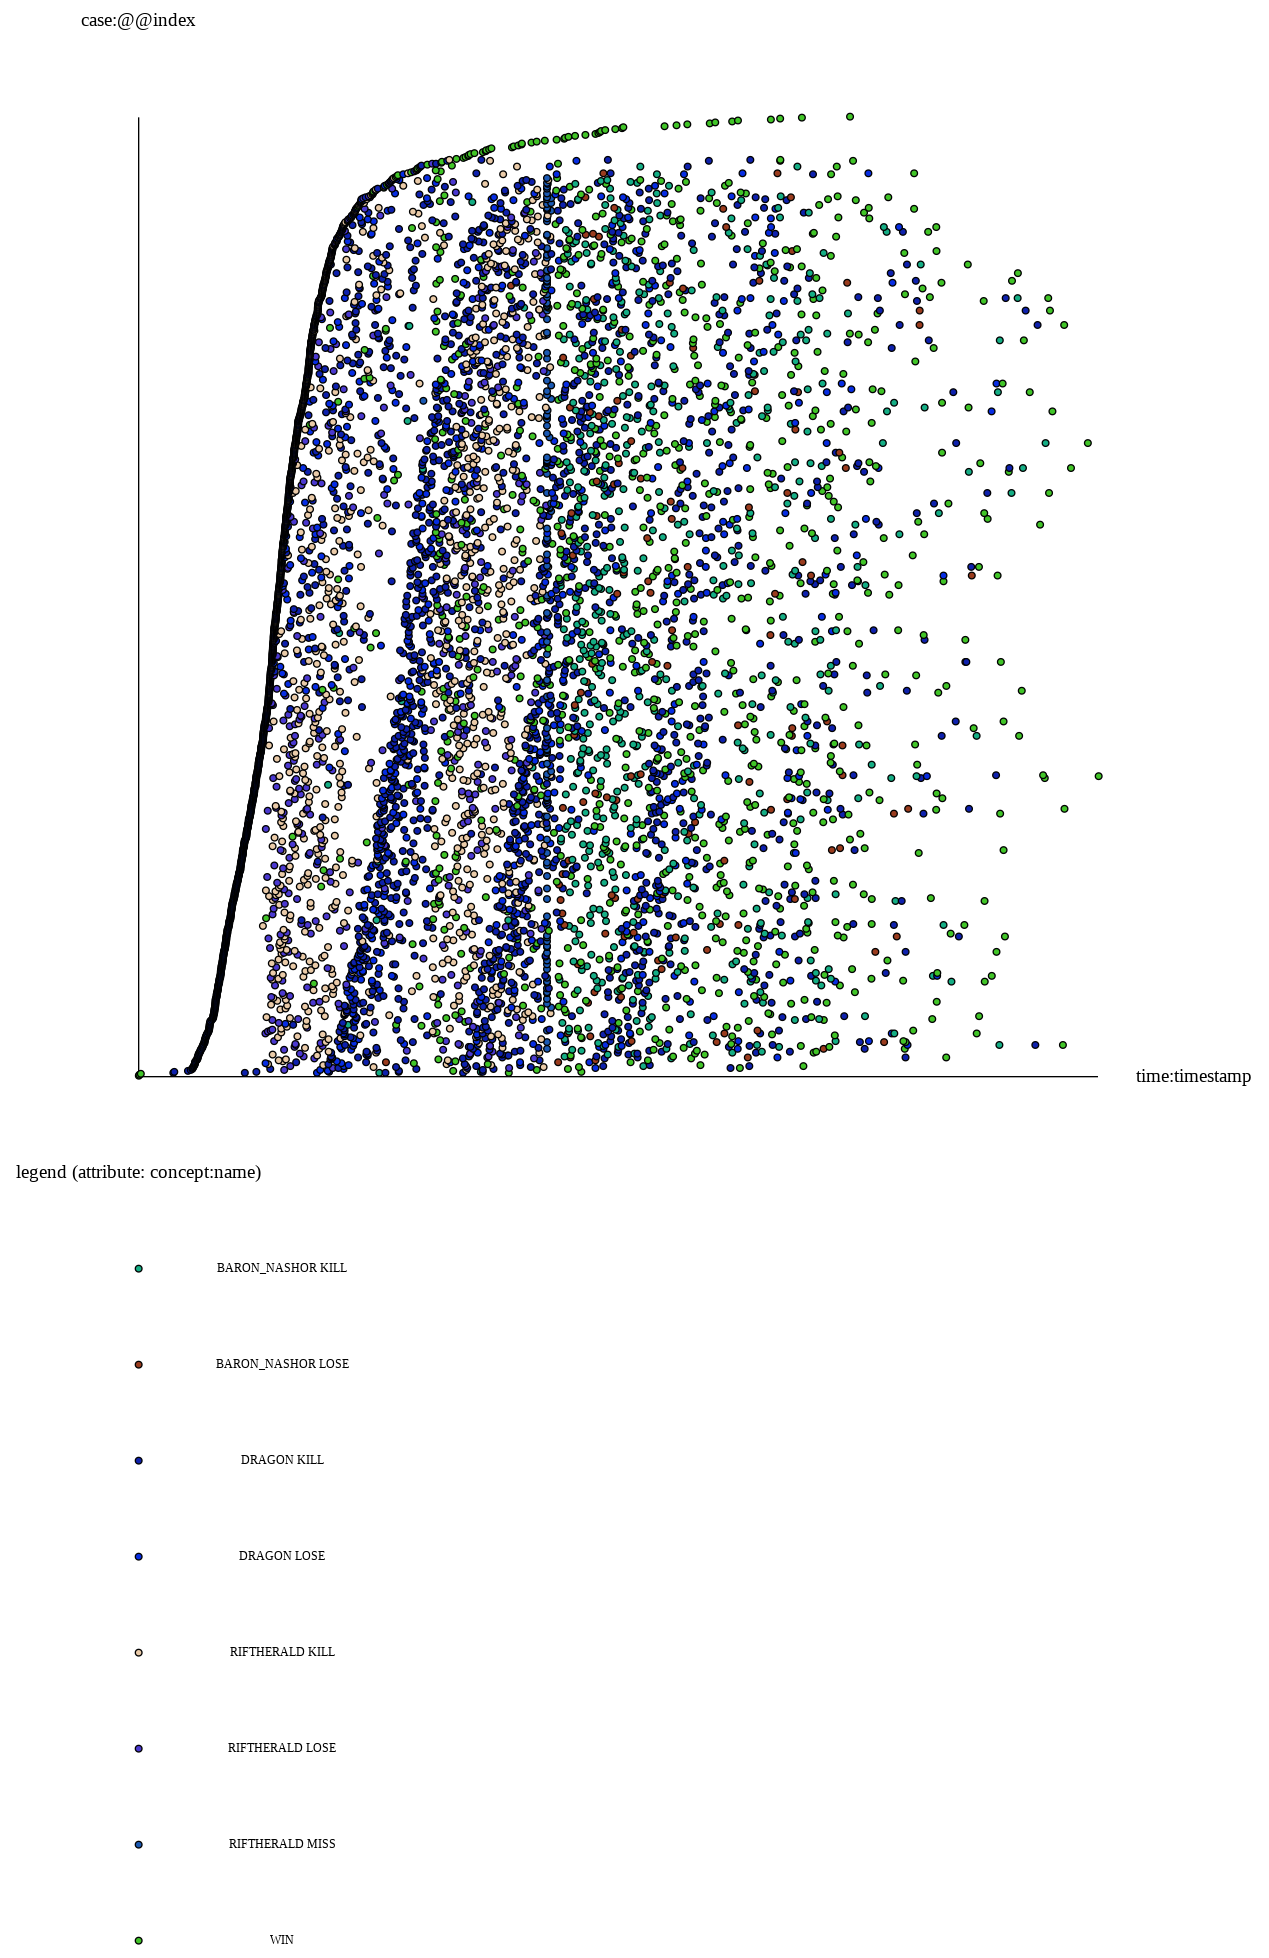

In [ ]:
pm4py.view_dotted_chart(event_log_pm4py)

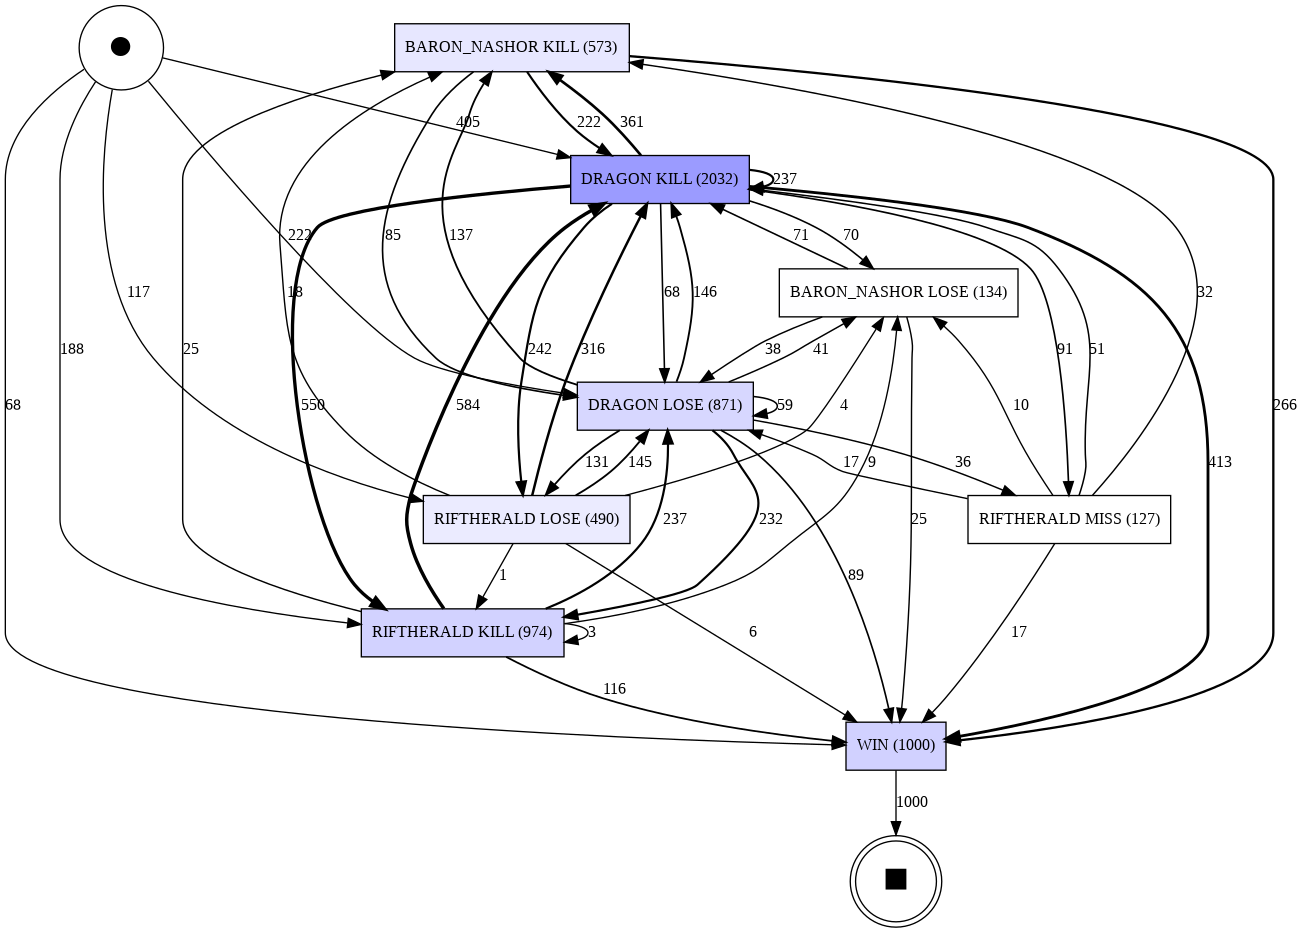

In [ ]:
#DFG
rel, start, final = pm4py.discover_dfg(event_log_pm4py)
pm4py.view_dfg(rel, start, final)

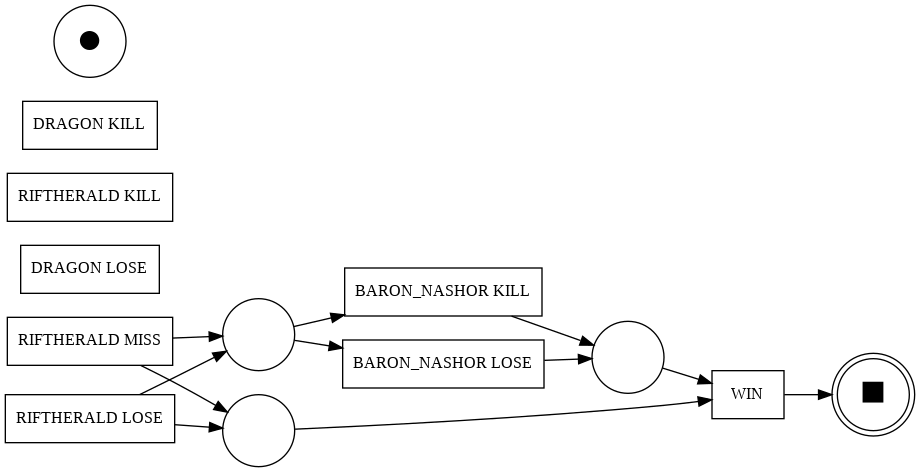

In [ ]:
# Alpha mining (Petri-net)  오류
net, im, fm = pm4py.discover_petri_net_alpha(event_log_pm4py)
pm4py.view_petri_net(net, im, fm)

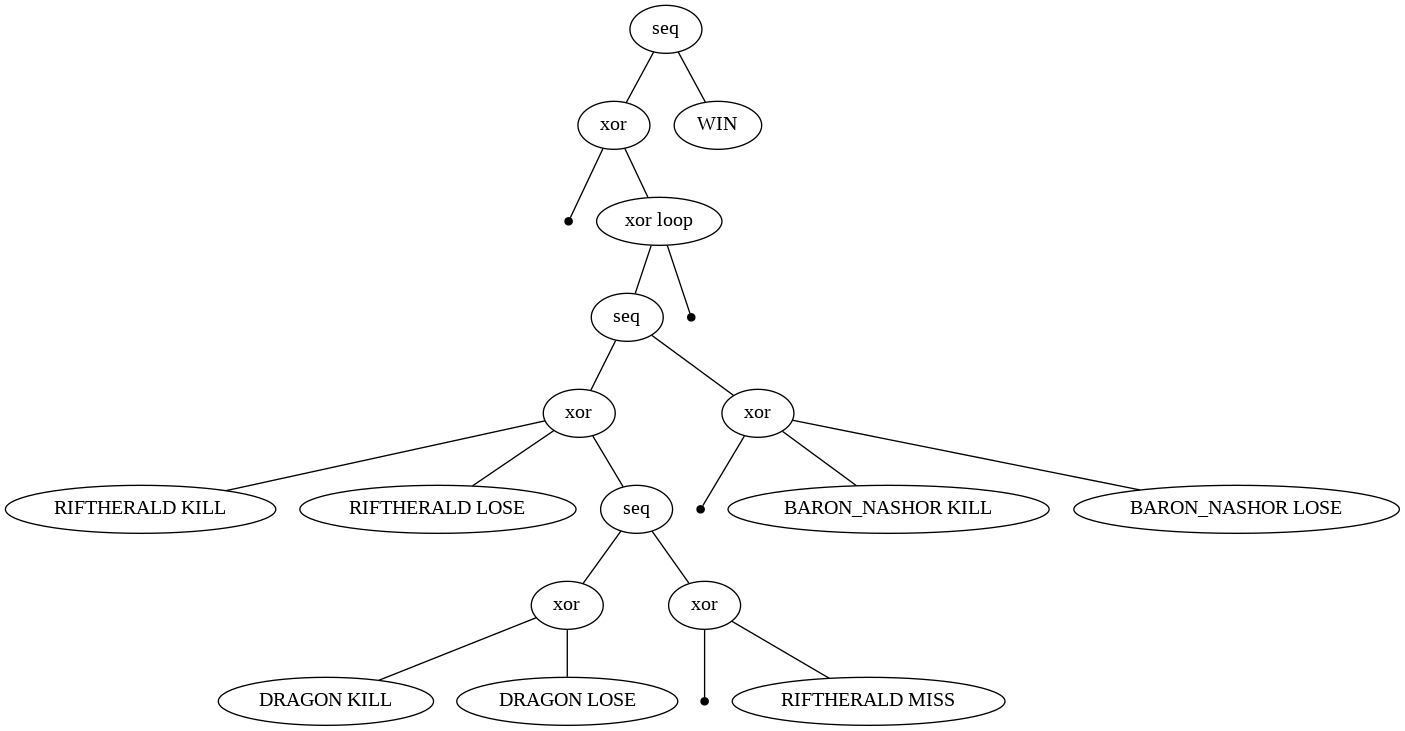

In [ ]:
#inductive Mining (Process tree)
tree = pm4py.discover_process_tree_inductive(event_log_pm4py)
pm4py.view_process_tree(tree)

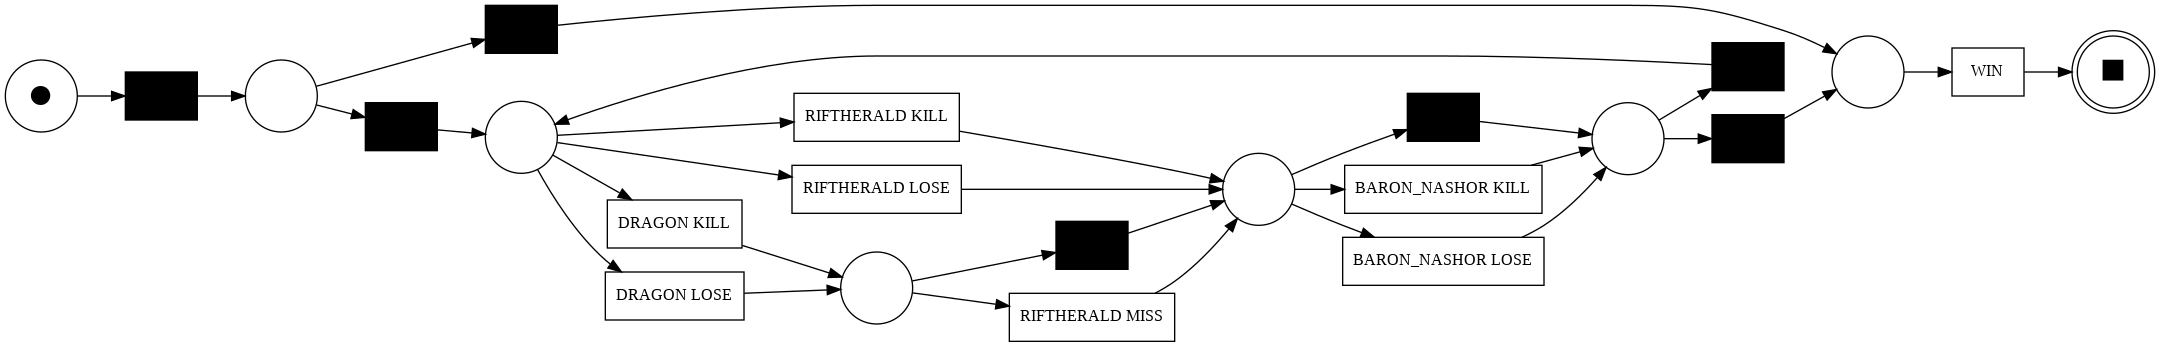

In [ ]:
# Process tree to petri-net
net2, im2, fm2 = pm4py.convert_to_petri_net(tree)
pm4py.view_petri_net(net2,im2,fm2)

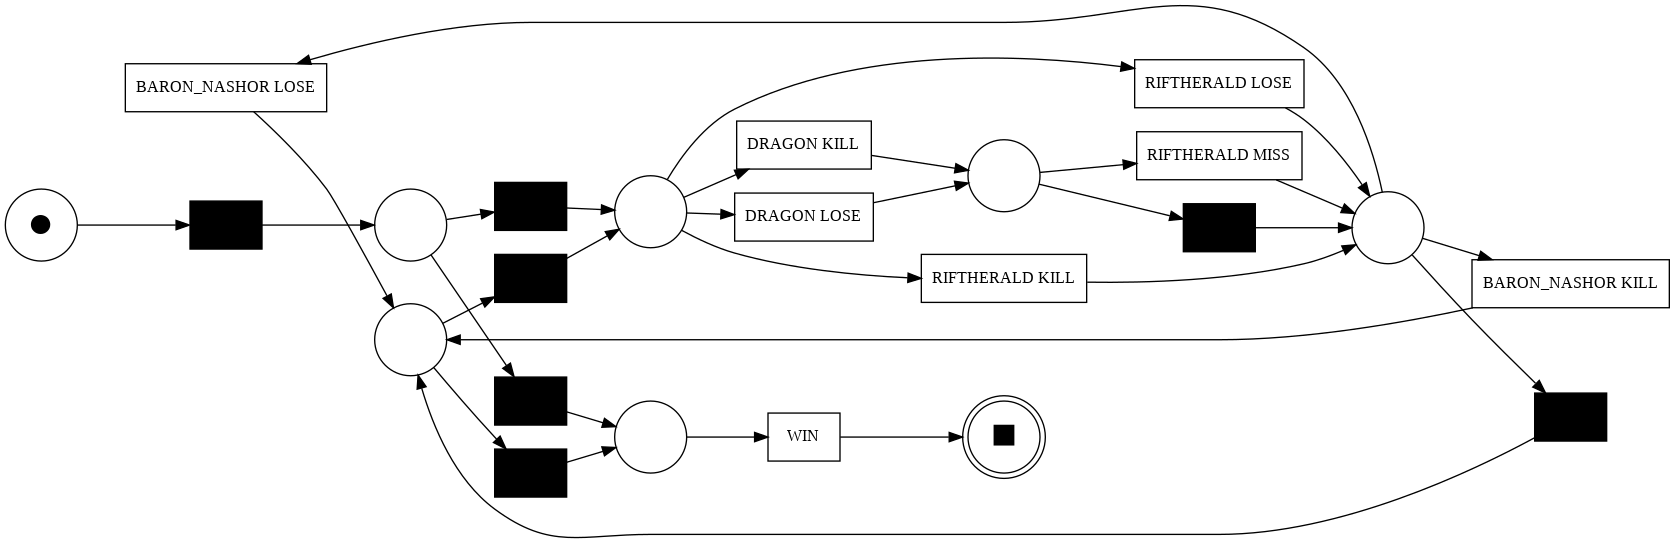

In [ ]:
# Inductive minig (Petri-net)
net3, im3, fm3 = pm4py.discover_petri_net_inductive(event_log_pm4py)
pm4py.view_petri_net(net3, im3, fm3)

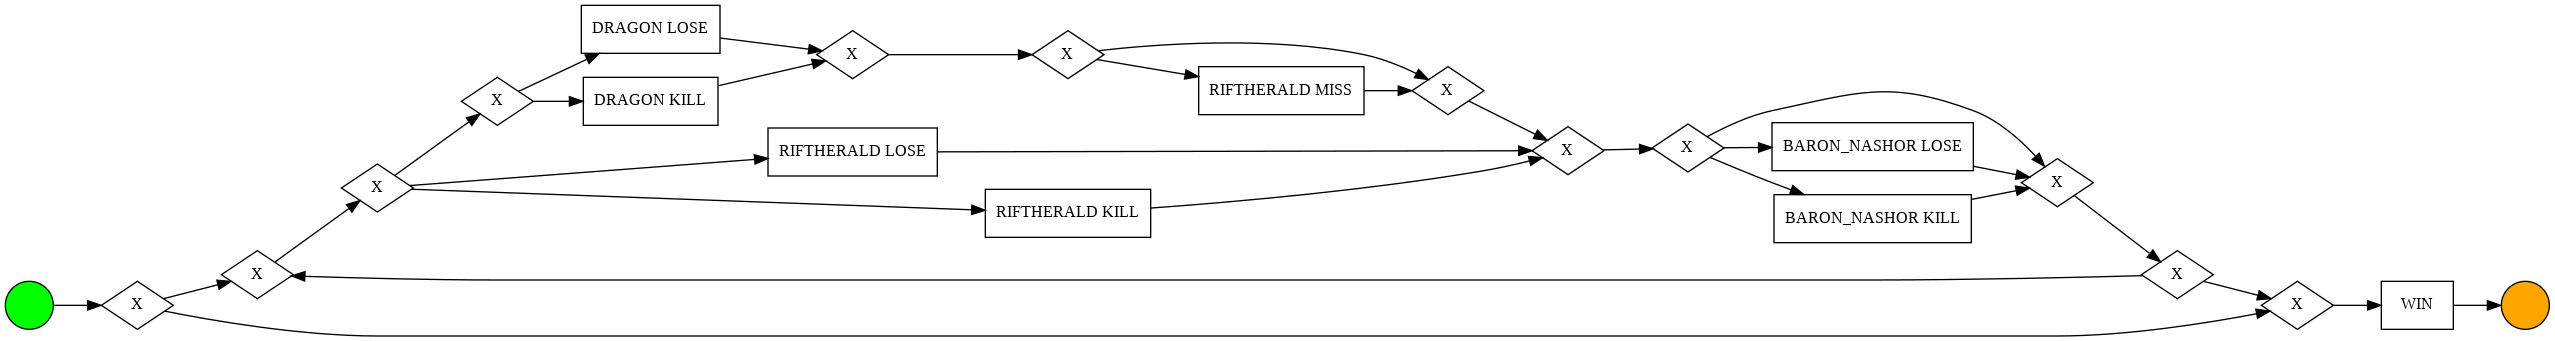

In [ ]:
# Inductive mining (BPMN)
bpmn = pm4py.discover_bpmn_inductive(event_log_pm4py)
pm4py.view_bpmn(bpmn)

위의 여러가지 프로세스를 진행해 보았는데
Threshold 전처리를 할 수 있고
진행의 빈도, 순서를 고려할 수 있는
휴리스틱 모델이 적합하다고 판단

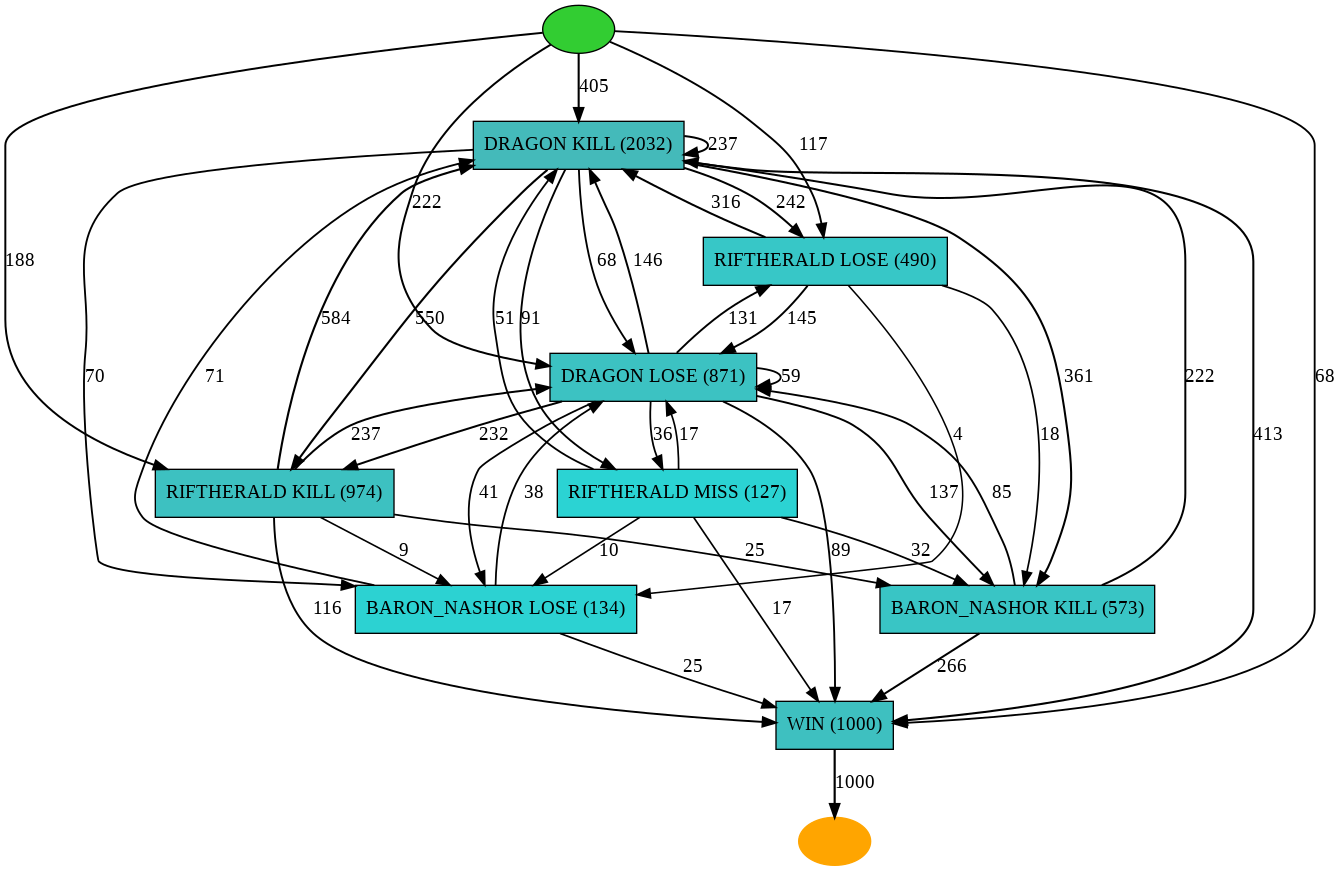

In [ ]:
# Heuristic Mining 
heu_model = pm4py.discover_heuristics_net(event_log_pm4py)
pm4py.view_heuristics_net(heu_model)

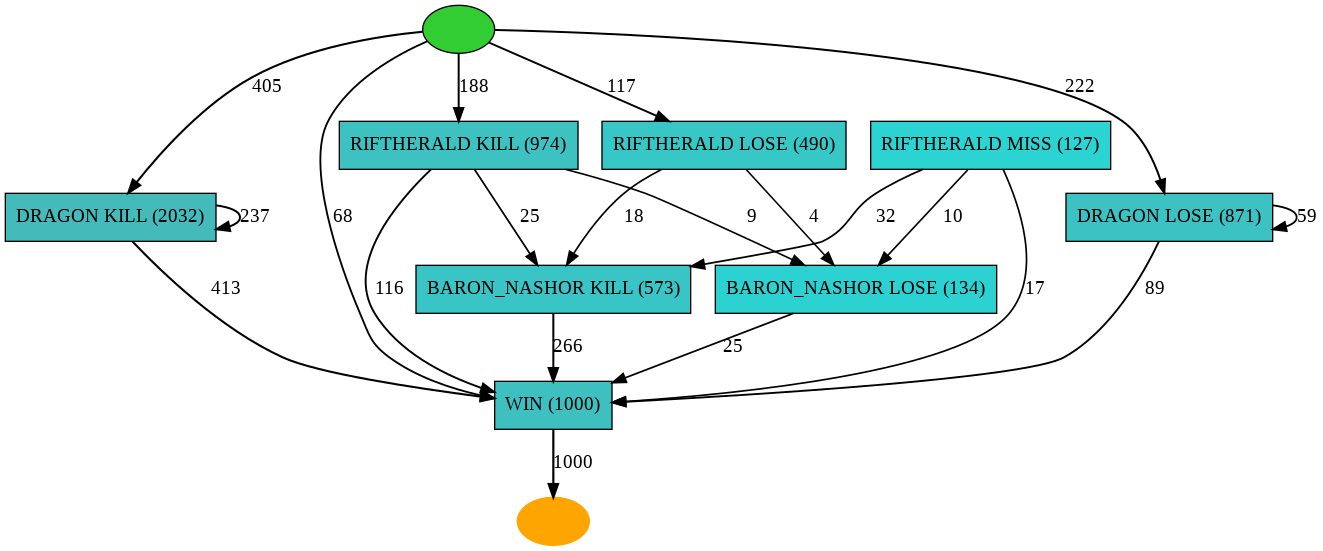

In [ ]:
# Heuristic Mining
heu_model = pm4py.discover_heuristics_net(event_log_pm4py,loop_two_threshold=0.999)
pm4py.view_heuristics_net(heu_model)